In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
df.columns = df.columns.str.replace(' ','_')

In [6]:
df.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.columns[df.isna().any()]

Index([], dtype='object')

**Plotting**

<AxesSubplot:xlabel='quality', ylabel='citric_acid'>

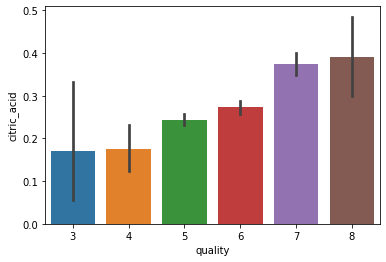

In [8]:
sns.barplot(x='quality',y='citric_acid',data=df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

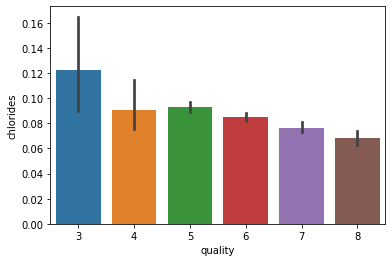

In [9]:
sns.barplot(x='quality',y='chlorides',data=df)

<AxesSubplot:xlabel='quality', ylabel='residual_sugar'>

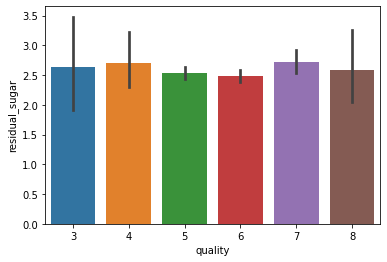

In [10]:
sns.barplot(x='quality',y='residual_sugar',data=df)

<AxesSubplot:xlabel='citric_acid', ylabel='fixed_acidity'>

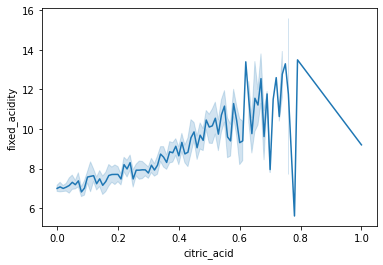

In [11]:
sns.lineplot(x='citric_acid',y='fixed_acidity',data=df)

In [12]:
def qualityupdate(df):
    for i,row in df.iterrows():
        val = row['quality']
        if val  <=6:
            df.at[i,'quality']=0
        else:
            df.at[i,'quality']=1
qualityupdate(df)

In [13]:
df.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0


**Train test split**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x= df.drop(['quality'],axis=1)
y=df['quality']

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc= StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)



SVM

In [20]:
from sklearn.svm import SVC

In [21]:
reg = SVC()

In [22]:
reg.fit(xtrain,ytrain)

SVC()

In [24]:
reg.score(xtest,ytest)

0.875

In [23]:
yp = reg.predict(xtest)

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
c = confusion_matrix(ytest,yp)

In [27]:
c

array([[268,   5],
       [ 35,  12]])

<AxesSubplot:>

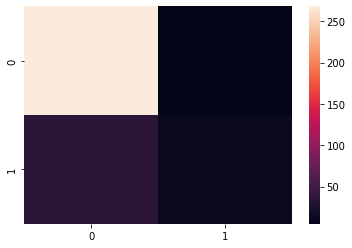

In [28]:
sns.heatmap(c)

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
model = GridSearchCV(reg,{
    'C':[0.1,0.4,0.8,1.0,1.3],
    'gamma':[0.1,0.4,0.8,1.0,1.3],
    'kernel':['rbf','linear']
},scoring='accuracy',cv=10)model

In [31]:
model.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.4, 0.8, 1.0, 1.3],
                         'gamma': [0.1, 0.4, 0.8, 1.0, 1.3],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [32]:
model.best_params_

{'C': 1.3, 'gamma': 1.0, 'kernel': 'rbf'}

In [33]:
mod = SVC(C=1.3,gamma=1.0,kernel='rbf')

In [34]:
mod.fit(xtrain,ytrain)

SVC(C=1.3, gamma=1.0)

In [35]:
mod.score(xtest,ytest)

0.896875

Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc = RandomForestClassifier(n_estimators=200)

In [39]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=200)

In [40]:
rfc.score(xtest,ytest)

0.88125

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
rfc2 = cross_val_score(estimator=rfc,X=xtrain,y=ytrain,cv=10)

In [44]:
rfc2.mean()

0.9124569389763779

**Prediction**

In [45]:
df.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [46]:
a = [[6.0,0.3,0.1,2.4,0.002,10.0,33.0,0.99,4.5,0.55,12.0]]
mod.predict(a)

array([0])